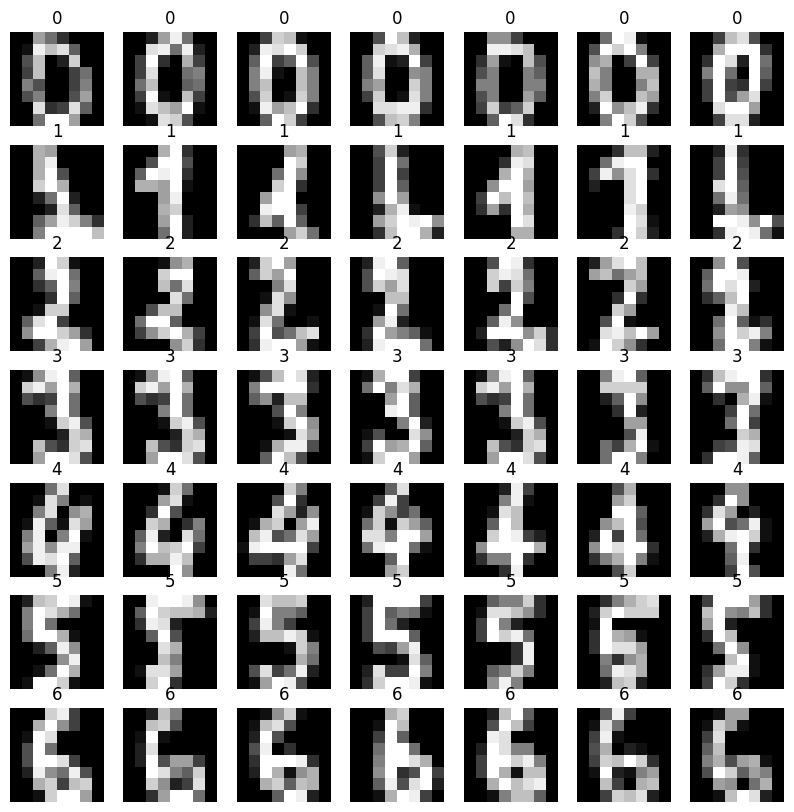

In [172]:
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from sklearn.datasets import load_digits

# Load the MNIST dataset
data = load_digits()
images = data.images
y = data.target

rows = 7
cols = 7

plt.figure(figsize=(10, 10))

for i in range(rows):
  current_image = 0
  j = 0
  while current_image < 7:
    data = np.random.randint(0,1797)
    label = (y[data])
    if label == i:
      sample = images[data,:,:]
      plt.subplot(rows, cols, (i * 7) + current_image + 1)
      plt.imshow(sample, cmap='gray')
      plt.axis('off')
      plt.title(label)
      current_image += 1
    j+=1

plt.show()

In [173]:
from sklearn import metrics, datasets, model_selection, svm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#load the iris data
data = datasets.load_iris()

#separate out the data and the target in x and y respectively
x = data.data
y = data.target


In [174]:
# split the data into 70:30 ratio
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape , y_test.shape)

#create the svm model
svm_model = svm.SVC(kernel='linear', gamma='scale', C=2)

#tarin the model
svm_model = svm_model.fit(x_train, y_train)

#predict the testing data labels
y_pred = svm_model.predict(x_test)

# classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

(105, 4) (105,)
(45, 4) (45,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [199]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/diabetes.csv')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [179]:
# x will be the holding all the Features column
x = data.drop('Outcome', axis=1, inplace= False)

# y will be the holding all the labels column
y = data['Outcome']

#split the data into 70:30 ratio
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size=0.3, random_state=0)
print(xtrain.shape,ytrain.shape)
print(xtest.shape , ytest.shape)

#create the svm classifier
dibts_svm_model = svm.SVC(kernel='poly', gamma='scale', C=1)

#tarin the model
dibts_svm_model = dibts_svm_model.fit(xtrain, ytrain)

#predict the labels
ypred = dibts_svm_model.predict(xtest)

# classification report
acc = metrics.accuracy_score(ytest, ypred)
print('Accuracy: ', acc)

conf_mat = metrics.confusion_matrix(ypred, ytest)
print()
print(conf_mat)

(537, 8) (537,)
(231, 8) (231,)
Accuracy:  0.7445887445887446

[[142  44]
 [ 15  30]]


In [180]:
#perform the EDA(Exploratory Data Analysis) on the diabetes dataset

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data.info()
print()
data.describe().astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768,768,768,768,768,768,768,768,768
mean,3,120,69,20,79,31,0,33,0
std,3,31,19,15,115,7,0,11,0
min,0,0,0,0,0,0,0,21,0
25%,1,99,62,0,0,27,0,24,0
50%,3,117,72,23,30,32,0,29,0
75%,6,140,80,32,127,36,0,41,1
max,17,199,122,99,846,67,2,81,1


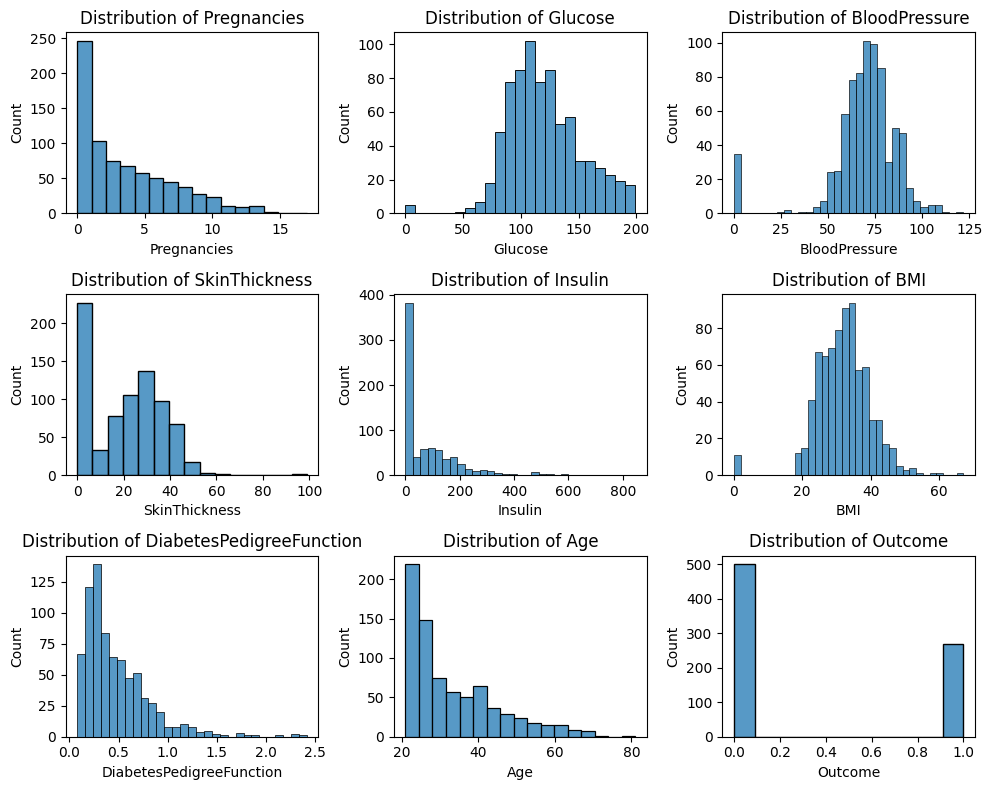

In [233]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(data.columns):
  plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
  sns.histplot(data=data, x=col)
  plt.title(f'Distribution of {col}')

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

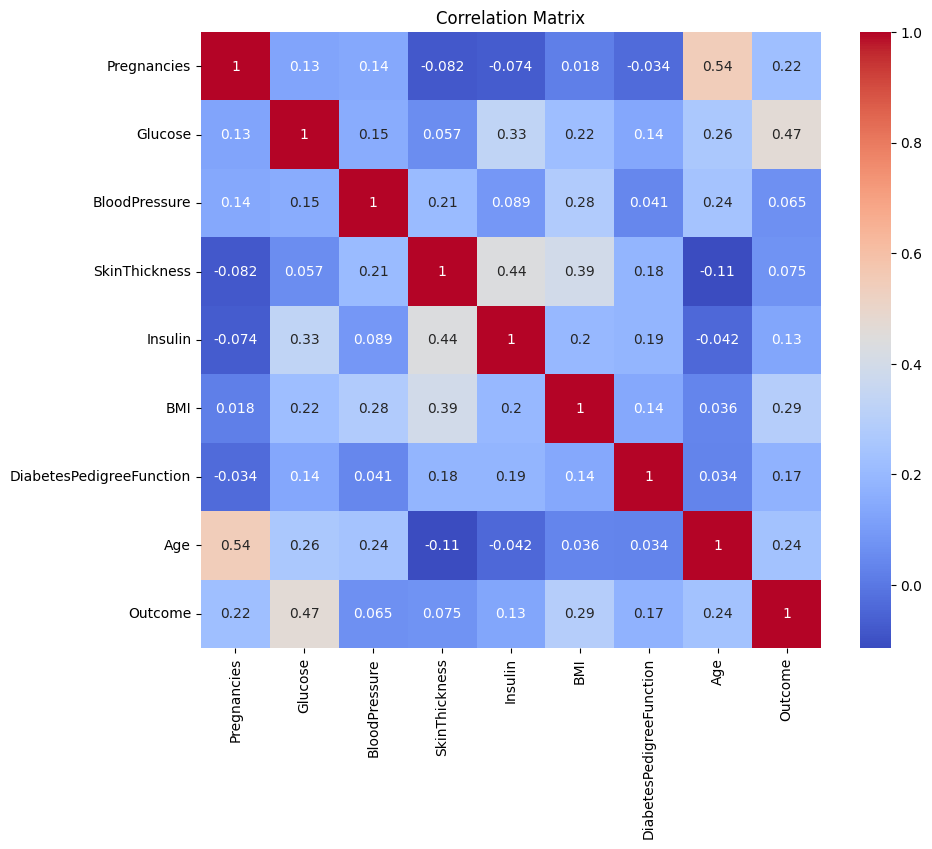

In [182]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Pregnancies', ylabel='Age'>

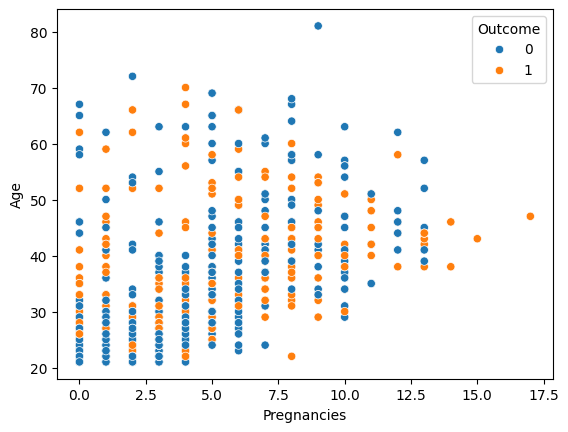

In [184]:
sns.scatterplot(x=data['Pregnancies'], y=data['Age'], hue=data['Outcome'])

Minimum Age:  21
Maximum Age:  81



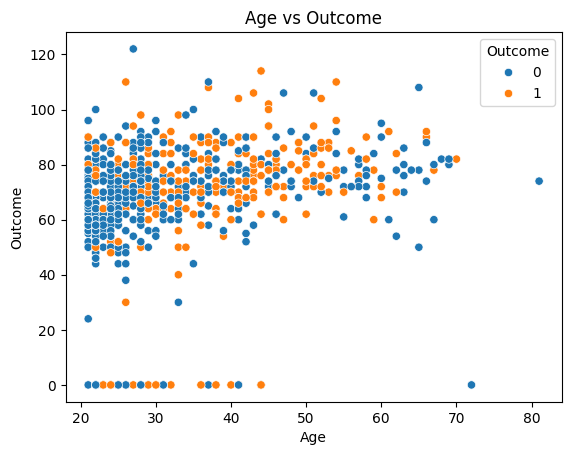

In [183]:
min_age = data['Age'].min()
max_age = data['Age'].max()
print('Minimum Age: ',min_age)
print('Maximum Age: ', max_age)
print()

sns.scatterplot(x= data['Age'], y= data['BloodPressure'], hue=data['Outcome'])
plt.title('Age vs Outcome')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.show()

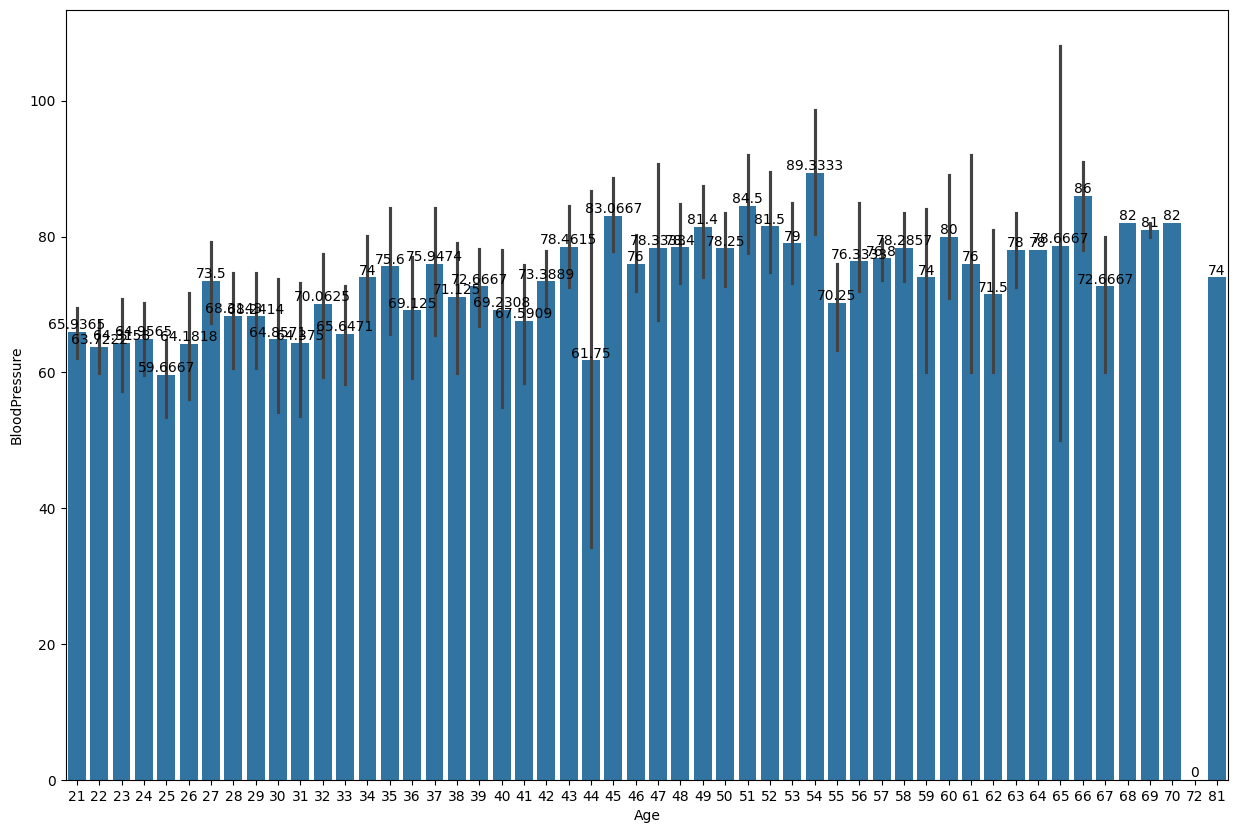

In [ ]:
plt.figure(1, figsize=(15, 10))
ax = sns.barplot(x=data['Age'], y= data['BloodPressure'])
for i in ax.containers:
  ax.bar_label(i)
plt.show()

([0], [Text(0, 0, '0')])

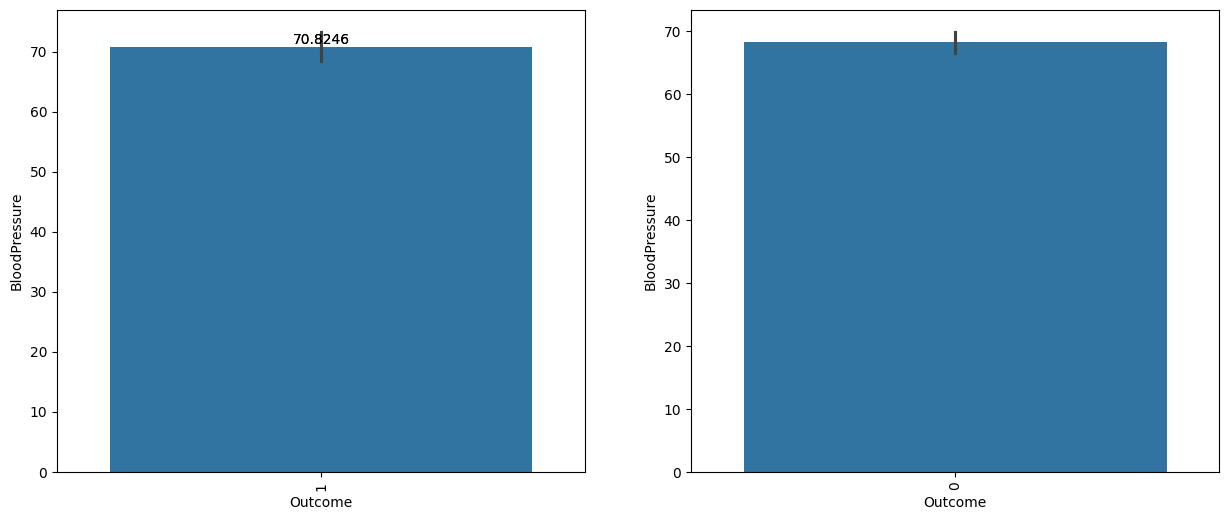

In [169]:
ind1= data['Outcome'] == True
ind2 = data['Outcome'] == False

outcome_true=data[ind1]
outcome_false=data[ind2]

plt.figure(1,figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.barplot(data= outcome_true, x='Outcome', y='BloodPressure')
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=outcome_false, x='Outcome', y='BloodPressure')
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)


In [ ]:
age = int(input("Enter the age: "))
if age<=30:
  print("Young")
elif age>31 and age<=45:
  print("Middle")
elif age>46 and age<=65:
  print("mature")
else:
  print("Old")

Enter the age: 45
Middle


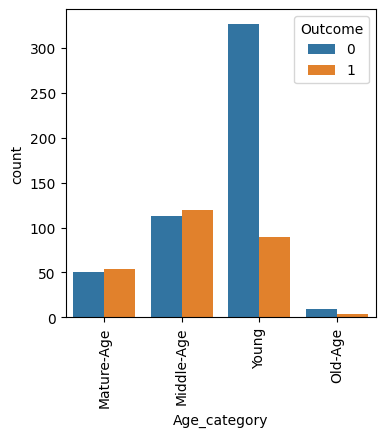

In [ ]:
import seaborn as sns
data['Age_category'] =data['Age'].copy()

ind = data['Age']<=30
data.loc[ind,'Age_category'] = "Young"

ind = (data['Age']<=45) & (data['Age']>30)
data.loc[ind,'Age_category'] = "Middle-Age"

ind = (data['Age']<=65) & (data['Age']>45)
data.loc[ind,'Age_category'] = "Mature-Age"

ind = (data['Age']>65)
data.loc[ind,'Age_category'] = "Old-Age"
data.head()

plt.figure(1,(4,4))
sns.countplot(data=data,x='Age_category',hue='Outcome')
plt.xticks(rotation=90)
plt.show()

In [221]:
import pandas as pd
import numpy as np

data= pd.read_csv("/content/diabetes.csv")
print(data.shape)
data.head()
# X will be holding all the feature columns
X = data.drop('Outcome',axis=1,inplace=False)

# y will be holding all the labels column
y = data['Outcome']


# split the data into 70:30 ratio
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    dibts_svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    dibts_svm_model = dibts_svm_model.fit(Xtrain,ytrain)

    # predict the labels
    ypred = dibts_svm_model.predict(Xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])

(768, 9)
(537, 8) (537,)
(231, 8) (231,)
[[0.78787879 0.78787879 0.77922078]
 [0.7965368  0.7965368  0.7965368 ]
 [0.78354978 0.77489177 0.76623377]]


         poly    linear       rbf
C=1  0.787879  0.796537  0.783550
C=2  0.787879  0.796537  0.774892
C=3  0.779221  0.796537  0.766234


<Axes: >

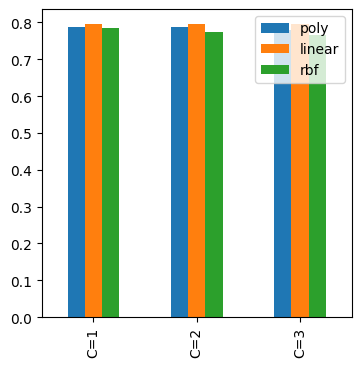

In [222]:
ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
ResultDF = ResultDF.T
print(ResultDF)
ResultDF.plot(kind='bar',figsize=(4,4))

(159, 7)



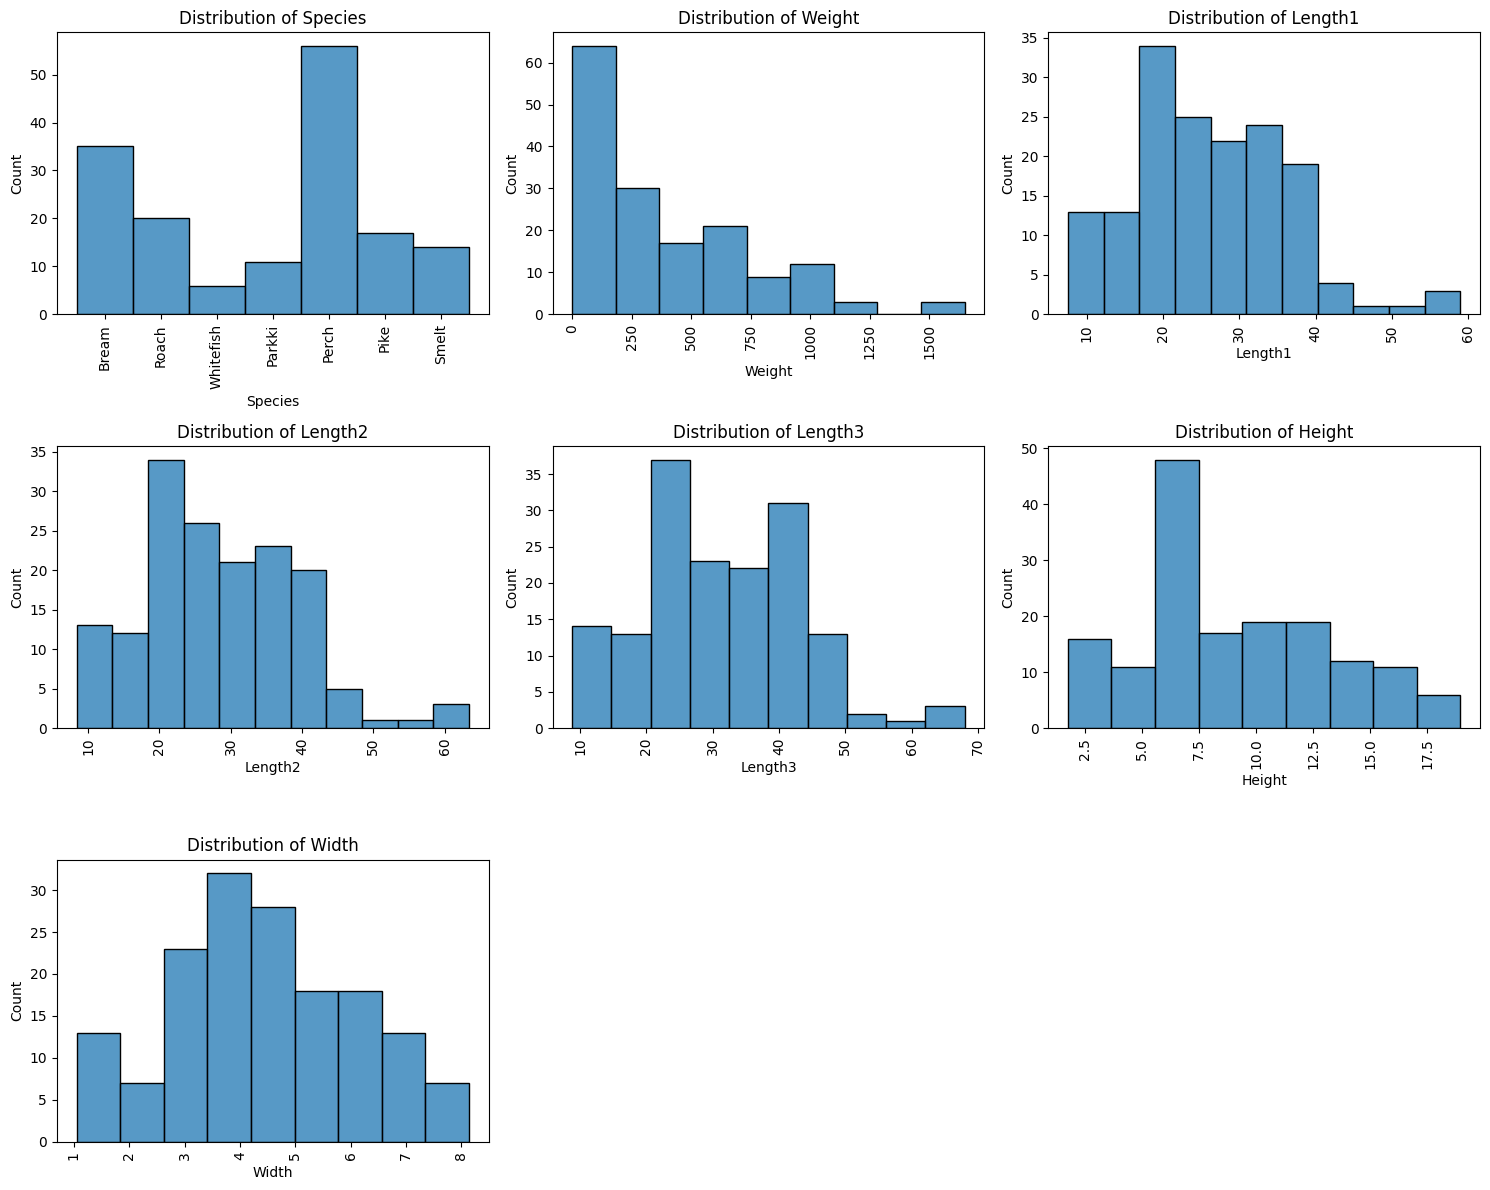

In [273]:
#Fish Data

d = pd.read_csv('/content/Fish.csv')
print(d.shape)
d.head()

print()

plt.figure(figsize=(15, 12))
for i, col in enumerate(d.columns):
  plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
  sns.histplot(data=d, x=col)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=90)
plt.tight_layout()  # Adjust spacing to prevent overlap

plt.show()

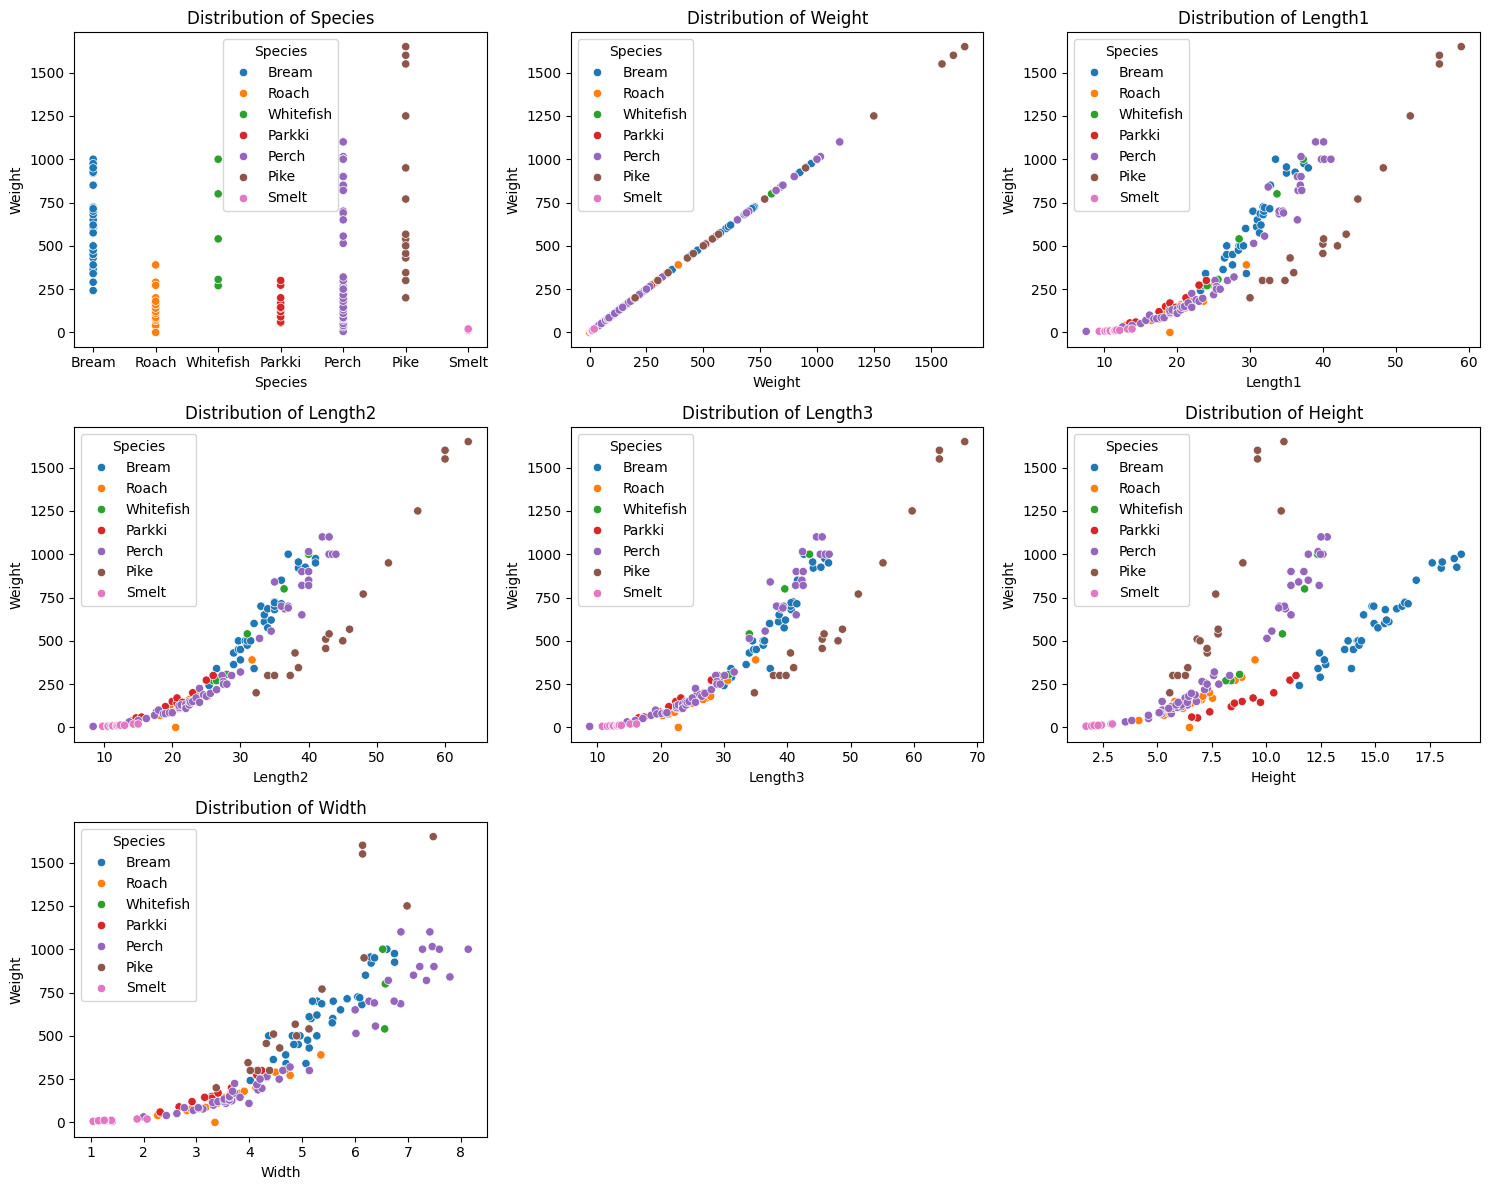

In [259]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(d.columns):
  plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
  sns.scatterplot(data=d, x=col, y='Weight', hue = 'Species')
  plt.title(f'Distribution of {col}')
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

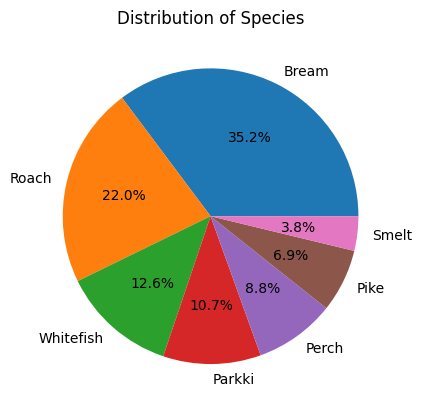

In [264]:
plt.pie(d['Species'].value_counts(),labels=d['Species'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Species')
plt.show()

In [228]:
x= d.drop('Species',axis=1,inplace=False)
y= d['Species']

# split the data into 70:30 ratio
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape , y_test.shape)

#create the svm model
svm_model = svm.SVC(kernel='linear', gamma='scale', C=2)

#tarin the model
svm_model = svm_model.fit(x_train, y_train)

#predict the testing data labels
y_pred = svm_model.predict(x_test)

# classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

(111, 6) (111,)
(48, 6) (48,)
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         9
      Parkki       1.00      1.00      1.00         3
       Perch       0.86      1.00      0.92        18
        Pike       1.00      0.71      0.83         7
       Roach       1.00      0.67      0.80         6
       Smelt       0.67      1.00      0.80         2
   Whitefish       0.67      0.67      0.67         3

    accuracy                           0.90        48
   macro avg       0.88      0.86      0.86        48
weighted avg       0.91      0.90      0.89        48



[[0.3125     0.3125     0.33333333]
 [0.85416667 0.875      0.85416667]
 [0.47916667 0.4375     0.4375    ]]

         poly    linear       rbf
C=1  0.312500  0.854167  0.479167
C=2  0.312500  0.875000  0.437500
C=3  0.333333  0.854167  0.437500



<Axes: >

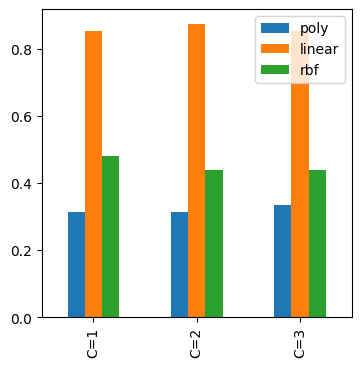

In [265]:
ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    dibts_svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    dibts_svm_model = dibts_svm_model.fit(xtrain,ytrain)

    # predict the labels
    ypred = dibts_svm_model.predict(xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
print()
ResultDF = ResultDF.T
print(ResultDF)
print()
ResultDF.plot(kind='bar',figsize=(4,4))